In [93]:
import pandas as pd
import numpy as np
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
%matplotlib inline
sns.set(color_codes=True)

In [94]:
kedro_raw_path = "./kedro-asi-cars/data/01_raw/"
df = pd.read_csv(kedro_raw_path + "Car_Prices_Poland_Kaggle.csv")
# Pierwsze 5 wierszy
df.head(5)

,Unnamed: 0,mark,model,generation_name,year,mileage,vol_engine,fuel,city,province,price
0,0,opel,combo,gen-d-2011,2015,139568,1248,Diesel,Janki,Mazowieckie,35900
1,1,opel,combo,gen-d-2011,2018,31991,1499,Diesel,Katowice,Śląskie,78501
2,2,opel,combo,gen-d-2011,2015,278437,1598,Diesel,Brzeg,Opolskie,27000
3,3,opel,combo,gen-d-2011,2016,47600,1248,Diesel,Korfantów,Opolskie,30800
4,4,opel,combo,gen-d-2011,2014,103000,1400,CNG,Tarnowskie Góry,Śląskie,35900


In [95]:
df = df.drop(df.columns[0], axis=1) # usuwamy kolumnę 0 - licznik wierszy

# Ostatnie 5 wierszy
df.tail(5) 

,mark,model,generation_name,year,mileage,vol_engine,fuel,city,province,price
117922,volvo,xc-90,gen-ii-2014-xc-90,2020,40000,1969,Hybrid,Katowice,Śląskie,222790
117923,volvo,xc-90,gen-ii-2014-xc-90,2017,51000,1969,Diesel,Chechło Pierwsze,Łódzkie,229900
117924,volvo,xc-90,gen-ii-2014-xc-90,2016,83500,1969,Gasoline,Pruszcz Gdański,Pomorskie,135000
117925,volvo,xc-90,gen-ii-2014-xc-90,2017,174000,1969,Diesel,Kalisz,Wielkopolskie,154500
117926,volvo,xc-90,gen-ii-2014-xc-90,2016,189020,1969,Gasoline,Sionna,Mazowieckie,130000


In [96]:
# Typy danych
df.dtypes

mark               object
model              object
generation_name    object
year                int64
mileage             int64
vol_engine          int64
fuel               object
city               object
province           object
price               int64
dtype: object

In [97]:
# rozmiar danych - ponad 117k wierszy
df.shape

(117927, 10)

In [98]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)
# Nie ma wierszy powtarzających się

number of duplicate rows:  (6473, 10)


In [99]:
print(df.isnull().sum())
# ponad 30k wpisów nie ma nazwy generacji - nie powinno to być dużym problemem, pewnie bardziej przyda się rok produkcji

mark                   0
model                  0
generation_name    30085
year                   0
mileage                0
vol_engine             0
fuel                   0
city                   0
province               0
price                  0
dtype: int64


<Axes: xlabel='price'>

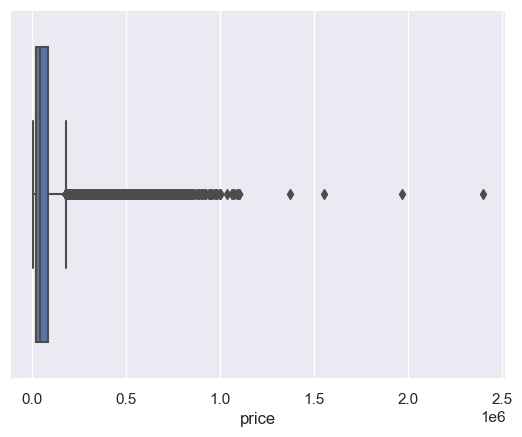

In [100]:
# Zobaczmy jak rozkładają się wartości

sns.boxplot(x=df['price'])

In [101]:
top_price = df.nlargest(10, 'price')
top_price

,mark,model,generation_name,year,mileage,vol_engine,fuel,city,province,price
61836,mercedes-benz,s-klasa,gen-w222-2013,2017,400,5980,Gasoline,Janki,Mazowieckie,2399900
61646,mercedes-benz,s-klasa,gen-w221-2005,2019,12000,6233,Gasoline,Poznań,Wielkopolskie,1966770
61810,mercedes-benz,s-klasa,gen-w222-2013,2018,21,5980,Gasoline,Warszawa,Mazowieckie,1550000
55530,mercedes-benz,amg-gt,NaN,2019,28500,3982,Gasoline,Poznań,Wielkopolskie,1368341
23470,audi,rs6,NaN,2021,20,3996,Gasoline,Jawczyce,Mazowieckie,1100000
34946,bmw,x6-m,NaN,2022,20,4395,Gasoline,Gdańsk,Pomorskie,1100000
55562,mercedes-benz,amg-gt,NaN,2020,16000,3982,Gasoline,Pruszcz Gdański,Pomorskie,1100000
55594,mercedes-benz,amg-gt,NaN,2020,16000,3982,Gasoline,Pruszcz Gdański,Pomorskie,1100000
55579,mercedes-benz,amg-gt,NaN,2021,6097,3982,Gasoline,Bobrowniki,Wielkopolskie,1090000
55611,mercedes-benz,amg-gt,NaN,2021,6097,3982,Gasoline,Bobrowniki,Wielkopolskie,1090000


Model może mieć problem, ponieważ mimo że tak duże ceny mogą być realne, to jednak zapewne obniżą jego precyzję.

<Axes: xlabel='price'>

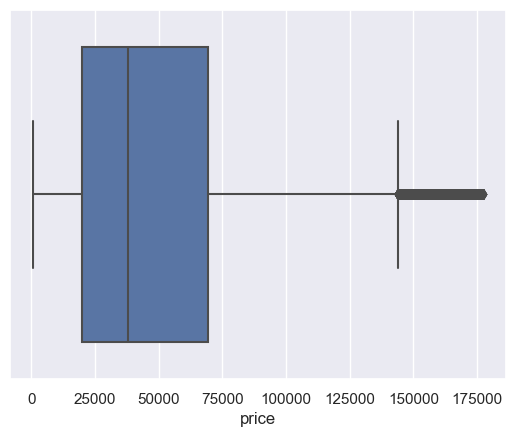

In [102]:
def usunOutliery(pole):
    Q1 = df[pole].quantile(0.25)
    Q3 = df[pole].quantile(0.75)
    IQR = Q3 - Q1
    return df[(df[pole] >= Q1 - 1.5 * IQR) & (df[pole] <= Q3 + 1.5 * IQR)] # usuwanie outlierów

df_bez_outlierow_price = usunOutliery('price')

sns.boxplot(x=df_bez_outlierow_price['price'])

<Axes: xlabel='mileage'>

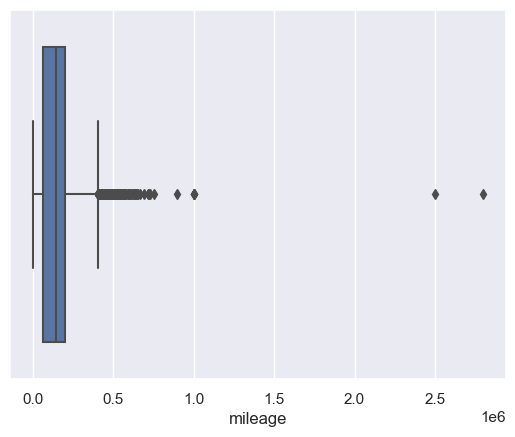

In [103]:
sns.boxplot(x=df['mileage'])

Z przebiegiem jest podobna sytuacja.

<Axes: xlabel='mileage'>

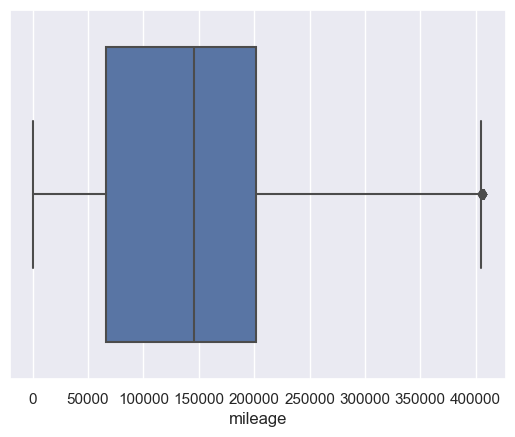

In [104]:
df_bez_outlierow_price_mileage = usunOutliery('mileage')

sns.boxplot(x=df_bez_outlierow_price_mileage['mileage'])

<Axes: xlabel='year'>

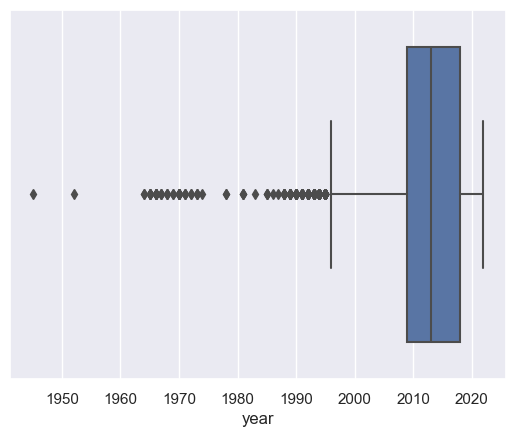

In [105]:
sns.boxplot(x=df_bez_outlierow_price_mileage['year']) # Rok jest już bardziej 'realny' więc na ten moment zostawiamy go w spokoju

<Axes: xlabel='vol_engine'>

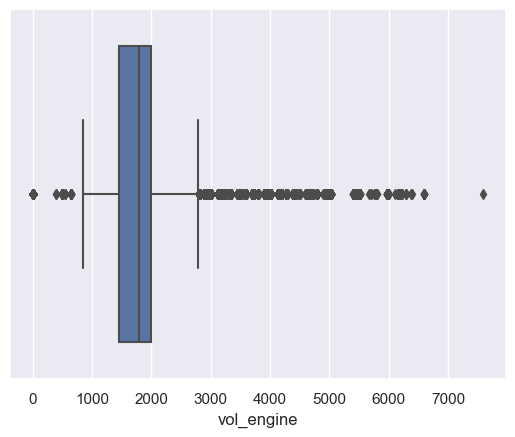

In [106]:
sns.boxplot(x=df_bez_outlierow_price_mileage['vol_engine']) # pojemność silnika - usuwamy wartości odstające

<Axes: xlabel='vol_engine'>

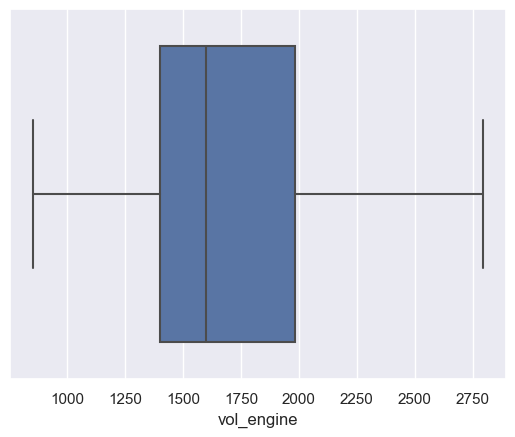

In [107]:
df_bez_outlierow_price_mileage_volengine = usunOutliery('vol_engine')

sns.boxplot(x=df_bez_outlierow_price_mileage_volengine['vol_engine'])

In [108]:
df_bez_outlierow_price_mileage_volengine.shape
# Nadal mamy sporo danych, jedynie 10k rekordów wyparowało po usunięciu wartości odstających

(107085, 10)

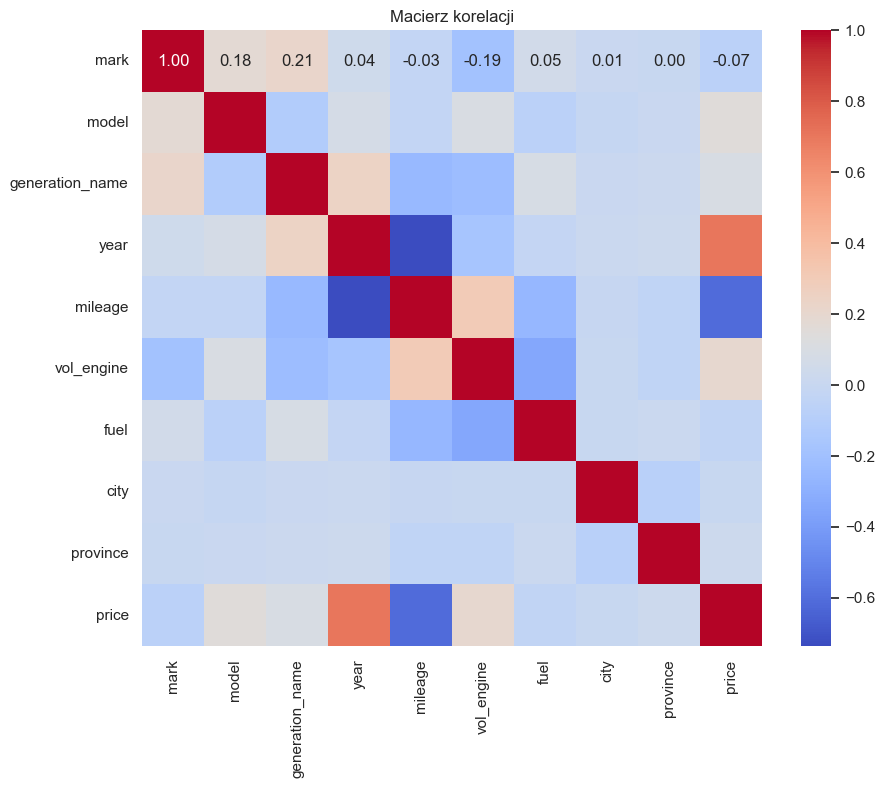

In [109]:
from sklearn.preprocessing import LabelEncoder

def zakoduj_wartosci_na_liczby(df):
    df_encoded = df.copy()
    label_encoder = LabelEncoder()

    for col in df.select_dtypes(include='object').columns:
        df_encoded[col] = label_encoder.fit_transform(df[col])
    return df_encoded

df_encoded = zakoduj_wartosci_na_liczby(df_bez_outlierow_price_mileage_volengine)

correlation_matrix = df_encoded.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Macierz korelacji')
plt.show()

Z macierzy widać, że cena koreluje najbardziej z pojemnością silnika oraz rocznikiem, a także modelem i nazwą generacji.
Zachodzi też odwrotna korelacja z przebiegiem.

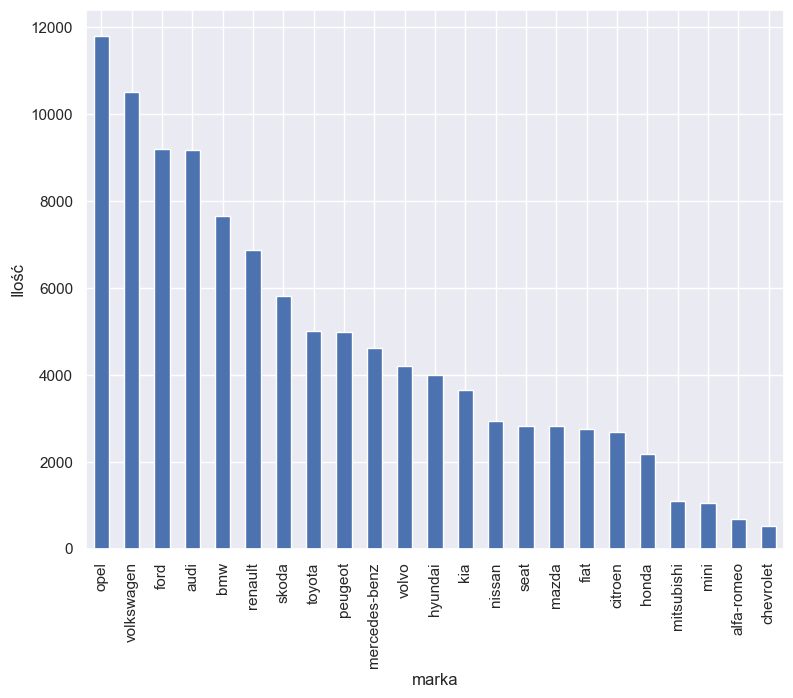

In [110]:
# ZObaczmy jeszcze jakie są najbardziej popularne wartości w niektórych kolumnach
df_bez_outlierow_price_mileage_volengine.mark.value_counts().nlargest(50).plot(kind='bar', figsize=(9,7))
plt.ylabel('Ilość')
plt.xlabel('marka');
# widać że najwięcej jest popularnych marek

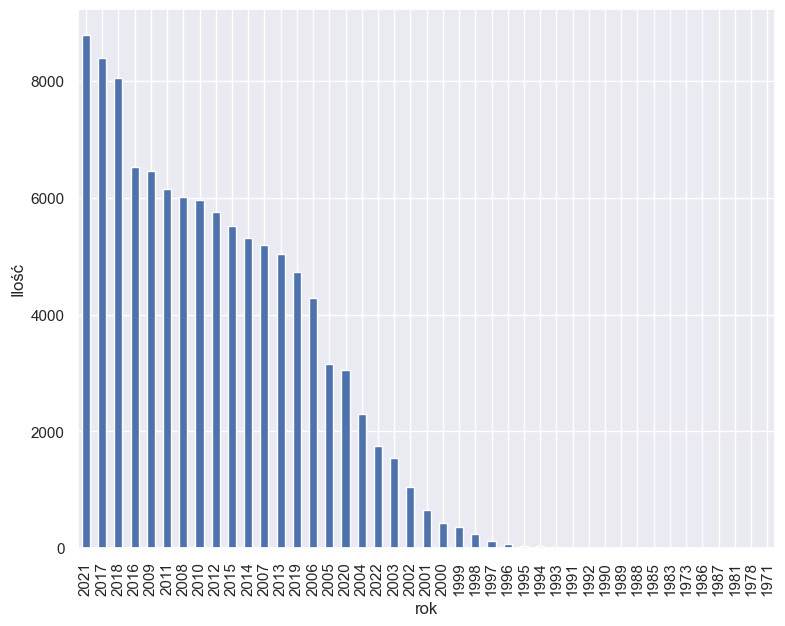

In [111]:
df_bez_outlierow_price_mileage_volengine.year.value_counts().nlargest(50).plot(kind='bar', figsize=(9,7))
plt.ylabel('Ilość')
plt.xlabel('rok');
# widać że najwięcej jest względnie nowych roczników

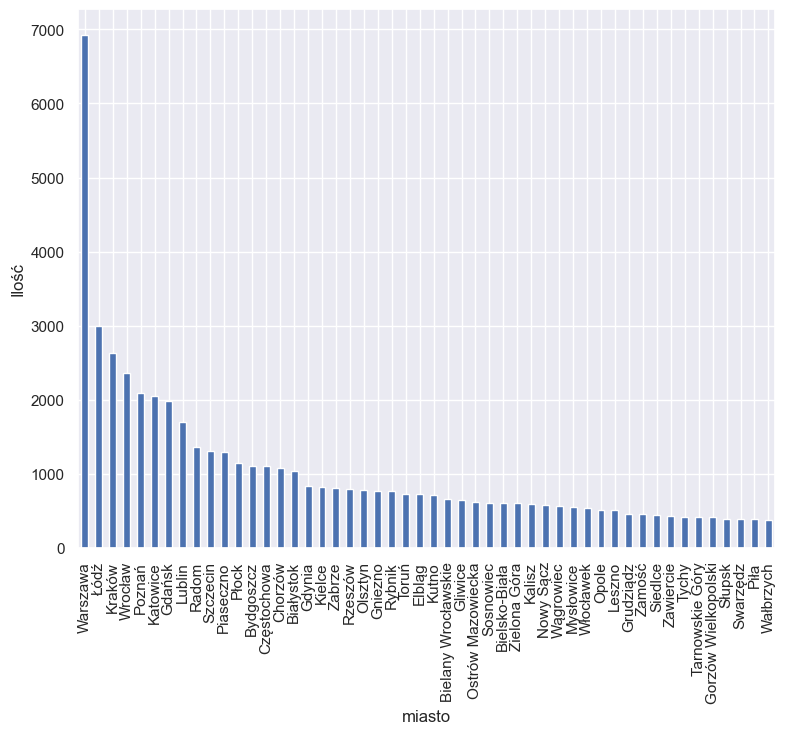

In [112]:
df_bez_outlierow_price_mileage_volengine.city.value_counts().nlargest(50).plot(kind='bar', figsize=(9,7))
plt.ylabel('Ilość')
plt.xlabel('miasto');
#Warszawa dominuje, ale ogólnie jest też sporo mniejszych miast

In [114]:
# zapisujemy wypracowany zbiór do pliku
#df_bez_outlierow_price_mileage_volengine.to_csv(kedro_raw_path + 'df_bez_outlierow_price_mileage_volengine.csv', index=False)

# nie potrzeba zapisywać do pliku, bo realizuje to node deleteOutliers